<img src='Cover5-01.png'>

# Регрессия и временные ряды

Сначала загрузим нужные нам библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
import scipy as sc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Загрузим датасет

In [3]:
ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
ts

,Dates,EnergyCons,Dev,WeekDay
0,2005-01-01 00:00,1290,-11,6
1,2005-1-1 1:0,1266,-12,6
2,2005-1-1 2:0,1273,-13,6
3,2005-1-1 3:0,1280,-14,6
4,2005-1-1 4:0,1293,-15,6
5,2005-1-1 5:0,1263,-16,6
6,2005-1-1 6:0,1279,-16,6
7,2005-1-1 7:0,1304,-16,6
8,2005-1-1 8:0,1330,-16,6
9,2005-1-1 9:0,1319,-17,6


Индексами должны являться даты

In [4]:
ts['Dates']=pd.to_datetime(ts['Dates'])
ts=ts.rename(columns={'Dates':'Timestamp'})
ts=ts.set_index('Timestamp')
ts

,EnergyCons,Dev,WeekDay
Timestamp,,,
2005-01-01 00:00:00,1290,-11,6
2005-01-01 01:00:00,1266,-12,6
2005-01-01 02:00:00,1273,-13,6
2005-01-01 03:00:00,1280,-14,6
2005-01-01 04:00:00,1293,-15,6
2005-01-01 05:00:00,1263,-16,6
2005-01-01 06:00:00,1279,-16,6
2005-01-01 07:00:00,1304,-16,6
2005-01-01 08:00:00,1330,-16,6


### Описание датасета

**Признаки**

- 'EnergyCons' --- потребляемая электроенергия
- 'Dev' --- темпиратура

## Регрессия

In [6]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression", width=800, height=400)

In [7]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge", width=800, height=400)

# Недообучение и переобучение

/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and 

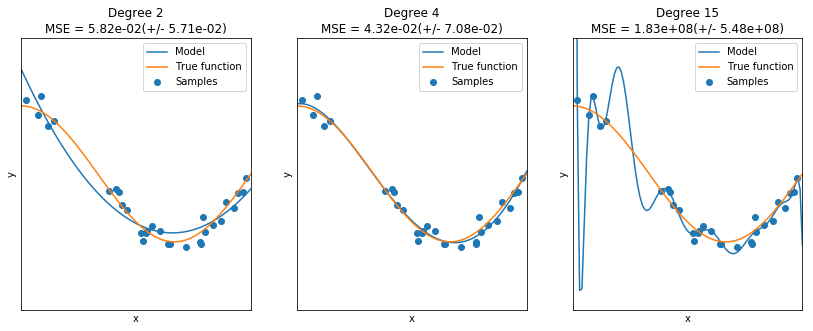

In [8]:
np.random.seed(0)

n_samples = 30
degrees = [2, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X) # ещё один способ определить функцию: с помощью lambda-функции

# Data Generation
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Как измерять качество?

In [9]:
# Quality functions
def qualitySSE(x,y):
    # Sum squared error
    # x - real values
    # y - forecasts
    return ((x-y)**2).sum(), (x-y)**2

def qualityMSE(x,y):
    # Mean squared error
    # x - real values
    # y - forecasts
    return ((x-y)**2).mean() , (x-y)**2

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityR2(x,y):
    # R2 statistics
    # x - real values
    # y - forecasts
    mean_y = y.mean()
    return 1-qualitySSE(x,y)[0]/qualitySSE(x,[mean_y]*len(x))[0]

# Приступим к нашей задаче

/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


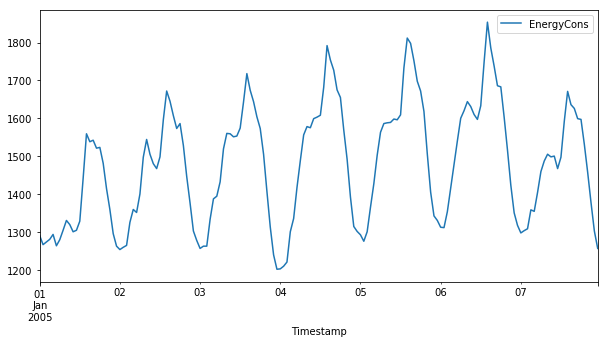

In [10]:
# the first week
ts.ix['2005-01-01 00:00:00':'2005-01-07 23:00:00', range(1)].plot(figsize(10,5))

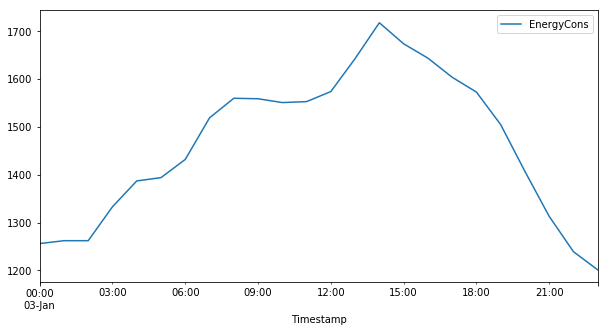

In [11]:
# the first day
ts.ix['2005-01-03 00:00:00':'2005-01-03 23:00:00', range(1)].plot(figsize(10,5))

## Авторегрессия

In [12]:
sc.linalg.hankel([1,2,3,4], [4,7,7,8,9])

array([[1, 2, 3, 4, 7],
       [2, 3, 4, 7, 7],
       [3, 4, 7, 7, 8],
       [4, 7, 7, 8, 9]])

In [13]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], x[-K:])
    y = x[K+h-1:]
    return X,y

###Прогноз следующий час (h=1) с окном истории - одна неделя (K=168)

In [14]:
K=168
h = 1 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

# frc_ts['EnergyCons'] = SimpleExponentialSmoothing(x, h, Params)

/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [15]:
print(X_train.shape)
print(y_train.shape)

(8593, 168)
(8593,)


In [16]:
# матрица объекты-признаки при авторегрессионном прогнозе
X_train

array([[1290, 1266, 1273, ..., 1377, 1302, 1256],
       [1266, 1273, 1280, ..., 1302, 1256, 1257],
       [1273, 1280, 1293, ..., 1256, 1257, 1267],
       ..., 
       [1332, 1293, 1225, ..., 1541, 1394, 1349],
       [1293, 1225, 1222, ..., 1394, 1349, 1312],
       [1225, 1222, 1278, ..., 1349, 1312, 1284]])

In [17]:
# целевой вектор
y_train

Timestamp
2005-01-08 00:00:00    1257
2005-01-08 01:00:00    1267
2005-01-08 02:00:00    1274
2005-01-08 03:00:00    1339
2005-01-08 04:00:00    1376
2005-01-08 05:00:00    1400
2005-01-08 06:00:00    1439
2005-01-08 07:00:00    1504
2005-01-08 08:00:00    1557
2005-01-08 09:00:00    1518
2005-01-08 10:00:00    1500
2005-01-08 11:00:00    1501
2005-01-08 12:00:00    1546
2005-01-08 13:00:00    1645
2005-01-08 14:00:00    1718
2005-01-08 15:00:00    1701
2005-01-08 16:00:00    1655
2005-01-08 17:00:00    1635
2005-01-08 18:00:00    1616
2005-01-08 19:00:00    1530
2005-01-08 20:00:00    1435
2005-01-08 21:00:00    1349
2005-01-08 22:00:00    1266
2005-01-08 23:00:00    1247
2005-01-09 00:00:00    1227
2005-01-09 01:00:00    1252
2005-01-09 02:00:00    1250
2005-01-09 03:00:00    1298
2005-01-09 04:00:00    1355
2005-01-09 05:00:00    1384
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-12-30

Train score: 0.996, Test score: 0.970


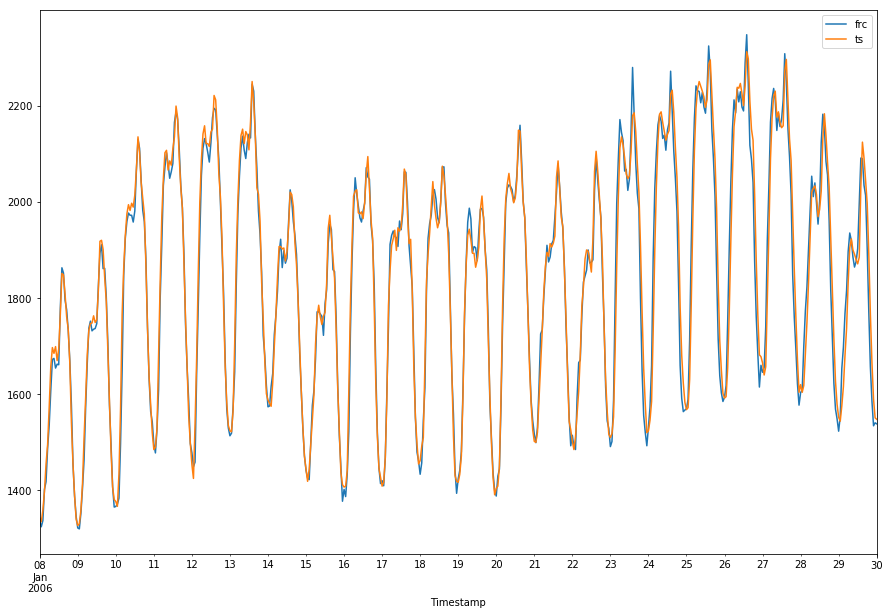

In [18]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize(15,10))

### Увеличим отсрочку проноза h=168

Train score: 0.934, Test score: 0.871


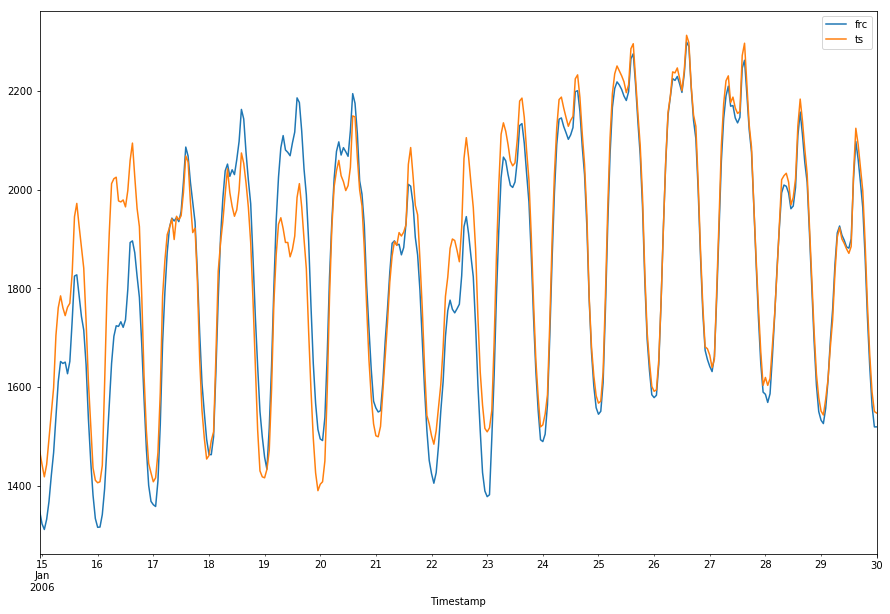

In [19]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize(15,10))

## Экспоненциальное сглаживание

In [20]:
# Exponential Smoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter

def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*alpha + (1-alpha)*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

###Прогноз следующий час (h=1)

In [21]:
# Forecasting delay
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#T = len(ts[ts.columns[0]])

In [22]:
# ES params
Params ={'alpha':0.9}
# forecast
x = ts['EnergyCons']
frc_ts['EnergyCons'] = SimpleExponentialSmoothing(x, h, Params)

/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'Time series' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


Quality 0.7675607536653463


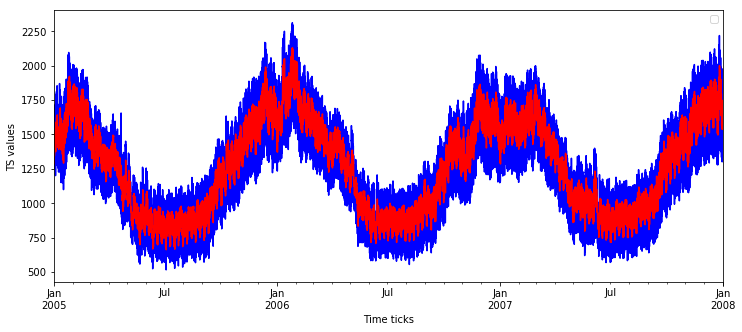

In [23]:
ts_num = 0 
ts[ts.columns[ts_num]].plot(style='b')
frc_ts[frc_ts.columns[ts_num]].plot(style='r', figsize=(12,5))
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend(['Time series'], ['ES Forecast'])
Qlt = qualityR2(ts['EnergyCons'], frc_ts['EnergyCons'])
print('Quality {}'.format(Qlt))

/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'Time series' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


Quality 0.7508154351901417


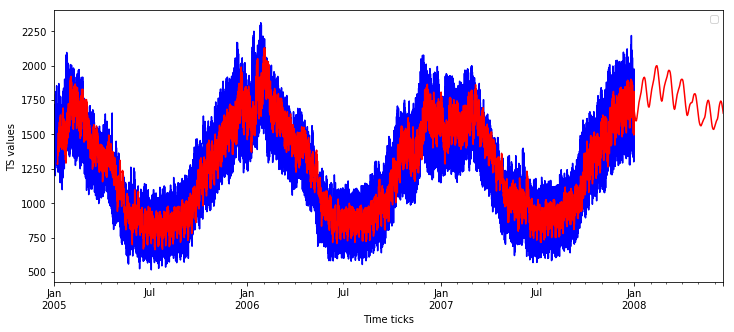

In [24]:
# Forecasting delay
h = 168
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#T = len(ts[ts.columns[0]])
# ES params
Params ={'alpha':0.9}
# forecast
x = ts['EnergyCons']
frc_ts['EnergyCons'] = SimpleExponentialSmoothing(x, h, Params)
ts_num = 0 
ts[ts.columns[ts_num]].plot(style='b')
frc_ts[frc_ts.columns[ts_num]].plot(style='r', figsize=(12,5))
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend(['Time series'], ['ES Forecast'])
Qlt = qualityR2(ts['EnergyCons'], frc_ts['EnergyCons'])
print('Quality {}'.format(Qlt))